<a href="https://colab.research.google.com/github/soominsong/Term_project_mission/blob/main/CoLab_TermProj_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 Mission 2 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
tar: ./root: file changed as we read it
./root/.vimrc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## Google Drive에 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. 1G씩 끊어지지만 자동으로 이어받아집니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

--2021-05-18 06:47:53--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... ^C


받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
md5sum: drive/MyDrive/binfo1-datapack1/colab-biolab: Is a directory
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
f691d94ca9c72e6feedbfe4561dd5b83  drive/MyDrive/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  drive/MyDrive/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

In [ ]:
!ls -al drive/MyDrive/binfo*

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y bedtools bioawk

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h5bf99c6_6


Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


## Mission 2

이번 미션에서는 start codon 주변에서 ribosome-protected fragment의 분포를 한 번 살펴보겠습니다. 보통은 RPF의 5'-end 분포가 start codon 앞 15nt 정도에서부터 본격적으로 많이 나오고, 거기서부터 CDS를 걸쳐서 3nt 주기로 올록볼록한 패턴이 나타납니다.

이 그림을 제대로 그리려면 genome coordinate를 start codon을 기준으로 변환해서 작업해야 하지만, 이번 미션에서는 난이도를 적절히 내리기 위해서 start codon이 포함된 exon에 존재하는 5' end만 추려서 작업하도록 합시다. (여유가 좀 있어서 난이도를 적당히 올리고 싶은 분들은 negative strand를 포함할 수도 있고, start codon과 다른 exon에 있는 경우를 포함할 수도 있습니다. 또한 APPRIS 등을 기반으로 해서 transcript 중에 가장 )

In [ ]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


우선 annotation에서 start codon이 포함된 exon만 추립니다. Gene 한 개에 isoform이 여러 개 있는 경우 모두 쓰면 read가 너무 부풀려질 수 있기 때문에 우선 transcript support level이 1인 것만 추려서 사용합니다. 여전히 TSL 1만 쓰더라도 부풀려질 가능성은 있기 때문에 제대로 하자면 APPRIS나 RNA-seq 데이터 기준으로 하나만 선정하는 것이 좋습니다만, 일단 여기서는 간단히..

그리고, - strand가 들어가면 좀 계산이 복잡해지니까 또 간단하게 하기 위해서 + strand만 고릅니다. 이번엔 일단 무조건 간단하게 해 봅시다~

In [ ]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


start codon가 들어가 있는 exon들을 고르기 위해서 미리 + strand에 있는 exon를 추립니다.. start codon 쪽에서 TSL 기준으로 골랐기 때문에 여기서는 고르지 않아도 됩니다. 물론 좀 느려지기는 하지만...

In [ ]:
!grep '	exon	.*	+	' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


그 다음엔 exon 리스트와 start codon 리스트를 겹치고, transcript가 같은 것만 살려둡니다. 기왕 좀 다루기 쉽도록 출력은 bed로 하면서 좌표계를 바꿉니다. 결과는 bedtools에서 빠르게 다룰 수 있게 sort해 둡니다.

In [ ]:
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

컬럼 4번에 transcript id, 5번에 start codon 위치를 넣었는데, start codon이 같은 것들이 여러개 눈에 띕니다. 아주 찝찝하지만, 우선 이번은 간단하게 할 것이기 때문에 눈을 질끈 감고 넘어가 봅시다.

이제 alignment를 준비합니다. + strand alignment에서 read length가 짧은 것도 미리 필터링 합니다. RPF는 보통 25nt 이상이기 때문에 그 이하는 거의 확실히 rRNA, tRNA 등에서 오염된 것들입니다. SAM 파일 전체를 필터링해서 다시 인코딩하기 때문에 시간이 좀 걸립니다.

In [ ]:
!(samtools view -H RPF-siLuc.bam; \
  samtools view -F20 RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

큰 일을 했으니 용량을 한 번 봅니다.

In [ ]:
!ls -al *RPF-siLuc.bam

자 이제 read의 5' end 위치를 셉니다. bedtools의 `genomecov`를 쓰면 아주 편리합니다.

In [ ]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

tcmalloc: large alloc 1561239552 bytes == 0x5593be486000 @  0x7f8e50e60887 0x5593bbd9dfea 0x5593bbda26fd 0x5593bbda333f 0x5593bbd9b8a9 0x5593bbd4f773 0x7f8e5048abf7 0x5593bbd57569
tcmalloc: large alloc 1454047232 bytes == 0x5593be486000 @  0x7f8e50e60887 0x5593bbd9dfea 0x5593bbda26fd 0x5593bbda333f 0x5593bbd9b8a9 0x5593bbd4f773 0x7f8e5048abf7 0x5593bbd57569
^C
chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


그렇게 match 된 것들 중에 앞에서 찾은 start codon을 포함한 exon과 겹치는 것만 골라냅니다.

In [ ]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

^C
chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


모든 준비가 끝났습니다. 이제 Figure S5A 도전해 보세요!

* stop codon은 빼고 start codon 만입니다.
* 논문에서는 처리가 어려운 부분까지 모두 포함됐고, read를 중첩해서 세지 않았기 때문에, 여기서 세는 것과는 수치는 다를 수 있습니다.
* `pandas`로 한꺼번에 데이터를 모두 불러들이면 메모리가 부족할 수도 있습니다. 그런 경우에는 chunk를 쓰거나, 줄 단위로 처리해 보세요.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("fivepcounts-filtered-RPF-siLuc.txt", header = None, sep = '\t')

In [1]:
df['Relative Position'] = df[2]-df[8]
df.describe()

NameError: ignored

In [ ]:
df['Relative Position']=df['Relative Position'].astype('int64')
df.head()

,0,1,2,3,4,5,6,7,8,9,Relative Position
0,chr1,4878048,4878049,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-87
1,chr1,4878048,4878049,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-87
2,chr1,4878077,4878078,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-58
3,chr1,4878077,4878078,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-58
4,chr1,4878077,4878078,1,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+,-58


In [ ]:
df1 = df.groupby(['Relative Position']).agg({3: 'sum'})
df1

,3
Relative Position,
-7535,1
-7529,1
-7522,1
-7519,9
-7518,11
...,...
4755,3
4757,1
4759,1


In [ ]:
df2 = df1/1000
df2

,3
Relative Position,
-7535,0.001
-7529,0.001
-7522,0.001
-7519,0.009
-7518,0.011
...,...
4755,0.003
4757,0.001
4759,0.001


In [ ]:
df1['Relative Position']

KeyError: ignored

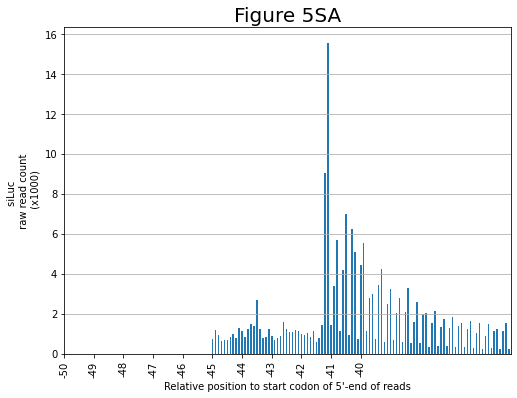

In [ ]:
ax = df2.loc[range(-50, 51)].reset_index().plot(x='Relative Position', y=3, kind='bar', figsize=(8, 6), legend = None)
ax.set_xlabel('Relative position to start codon of 5\'-end of reads')
ax.set_ylabel('siLuc \n raw read count \n (x1000)')
ax.set_title('Figure 5SA', fontsize=20)
ax.yaxis.grid(True)

ax.set_xticks(range(-50, 51, 10))
#ax.set_xticklabels(rotation=0)

In [ ]:
temp=pd.Seriese(df2['3'], index=int(df2['Relative Position']))
ax=temp.loc(range(-50,51).plot(kind='bar',figsize=(8,6), legend=None)
#ax.set_xlabel('Relative position to start codon of 5\'-end of reads')
#ax.set_ylabel('siLuc \n raw read count \n (x1000)')
#ax.set_title('Figure 5SA', fontsize=20)
#ax.yaxis.grid(True)

#ax.set_xticks(range(-50, 51, 10))


SyntaxError: ignored

In [ ]:
df2.loc[range(-50, 51)].reset_index()

Relative Position   -50.000
3                     0.748
Name: 0, dtype: float64